$\color{blue}{\huge {\text{3. Introduction to Keras and TensorFlow}}}$

<h3><span style="color:black">3.1 What is TensorFlow?</span></h3>

It’s important to keep in mind that TensorFlow is much more than a single library. It’s really a platform, home to a vast ecosystem of components, some developed by Google, some developed by third-parties. For instance, there’s TF-Agents for reinforcement learning research, TFX for industry-strength machine learning workflow management, TF-Serving for production deployment, there’s the TF-Hub repository of pretrained models...​ Together, these components cover a very wide range of use cases, from cutting-edge research to large-scale production applications.

<h3><span style="color:black">3.2. What is Keras?</span></h3>

Keras is a deep-learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep-learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

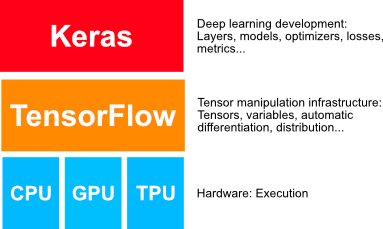

In [4]:
from IPython.display import Image
Image(filename= "Keras_block_diagram.jpg")

<h3><span style="color:black">3.3 Keras and TensorFlow: A brief history</span></h3>

By late 2017, a majority of TensorFlow users were using it through Keras or in combination with Keras. In 2018, the TensorFlow leadership picked Keras as TensorFlow’s official high-level API. As a result, the Keras API is front and center in TensorFlow 2.0, released in September 2019—an extensive redesign of TensorFlow and Keras that takes into account over four years of user feedback and technical progress.

<h3><span style="color:black">3.4. Setting up a deep-learning workspace</span></h3>

#### 3.4.1 Jupyter Notebooks: the preferred way to run deep-learning experiments

<h3><span style="color:black">3.5 First steps with TensorFlow</span></h3>

First, low-level tensor manipulation—the infrastructure that underlies all modern machine learning. This translates to TensorFlow APIs:<br>
• <b><i><span style="color:blue">Tensors</span></i></b> including special tensors that store the network’s state <b><i><span style="color:blue">variables</span></i></b><br>
• <b><i><span style="color:blue">Tensor operations</span></i></b> such as addition, relu, matmul<br>
• <b><i><span style="color:blue">Backpropogation </span></i></b>a way to compute the gradient of mathematical expressions (handled in TensorFlow via the GradientTape object)

Second, high-level deep learning concepts. This translates to Keras APIs:<br>
• <b><i><span style="color:blue">Layers</span></i></b> which are combined into a <b><i><span style="color:blue">model</span></i></b><br>
• <b><i><span style="color:blue">A loss function</span></i></b>, which defines the feedback signal used for learning<br>
• <b><i><span style="color:blue">An optimizer</span></i></b>, which determines how learning proceeds<br>
• <b><i><span style="color:blue">Metrics</span></i></b> to evaluate model performance, such as accuracy<br>
• <b><i><span style="color:blue">A training loop</span></i></b> that performs mini–batch stochastic gradient descent<br>

#### Constant tensors and variables
To do anything in TensorFlow, we’re going to need some tensors. Tensors need to be created with some initial value, so common ways to create tensors are:

#### 3.1 All-ones or all-zeros tensors

In [5]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape = (2, 1))
print(x)

Init Plugin
Init Graph Optimizer
Init Kernel
Metal device set to: Apple M1
tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


2021-09-06 08:24:59.556394: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-09-06 08:24:59.556637: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


#### 3.2 Random tensors

In [7]:
x = tf.random.normal(shape = (10,3), mean = 0., stddev= 1.)
print(x)
# equivalent to np.random.normal(size = (10,3), loc = 0

x = tf.random.uniform(shape=(5,4), minval=0., maxval=1.)
print(x)
# equivalent to np.random.uniform(size = (3,1), low = 0., high = 1.).

tf.Tensor(
[[-1.0682102  -2.1148672   0.7422351 ]
 [ 0.4258381   0.6804016   0.451017  ]
 [ 0.59796417  1.2305219   0.11929946]
 [-0.91755134  0.6082152  -0.7714716 ]
 [-1.7843974  -1.9127871   0.03259259]
 [-0.37322524  0.53023165  1.0004132 ]
 [ 0.5114985  -0.93993515  1.2565088 ]
 [-0.4451015  -1.1089598  -1.2308307 ]
 [-0.85235107  0.15785405 -0.97642773]
 [ 0.45757538  1.4179357   1.2590935 ]], shape=(10, 3), dtype=float32)
tf.Tensor(
[[0.9367852  0.5009811  0.86153924 0.05120194]
 [0.276677   0.8443848  0.37764227 0.15703297]
 [0.7069683  0.4929788  0.3663081  0.3303753 ]
 [0.59859395 0.96109986 0.77827764 0.17166376]
 [0.7706523  0.75132203 0.1659677  0.43969238]], shape=(5, 4), dtype=float32)


#### 3.3 NumPy arrays are assignable

In [8]:
import numpy as np
x = np.ones(shape = (2,2))
print(x[0,0])

1.0


#### 3.4  Note: Tensors are <b>NOT</b> assignable!

In [9]:
x = tf.ones(shape=(2,2))
print(x[0,0]) # returns an error

tf.Tensor(1.0, shape=(), dtype=float32)


To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it, then? That’s where variables come in. tf.Variable is the class meant to manage modifiable state in TensorFlow. You’ve already briefly seen it in action in the training loop implementation at the end of chapter 2.

#### 3.5 Creating a Variable

In [10]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v) # that worked!

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.27679184],
       [-1.2961401 ],
       [ 0.6616643 ]], dtype=float32)>


The state of a variable can be modified via ita `assign` method
#### 3.6 Assigning a value to a variable

In [13]:
v.assign(tf.ones((3,1)))


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Similarly, assign_add and assign_sub are efficient equivalents of += and -=:
#### 3.8 Using assign_add

In [20]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

#### 3.9 A few basic math operations in Tensorflow

In [23]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


<b>A Second Look at the `GradientTape` API<br></b><br>
So far, TensorFlow seems to look a lot like NumPy. But here’s something NumPy can’t do: retrieve the gradient of any differentiable expression with respect to any of its inputs. Just open a GradientTape scope, apply some computation to one or several input tensors, and retrieve the
gradient of the result with respect to the inputs.

In [27]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

This is most commonly used to retrieve the gradients of the loss of a model with respect to its weights: gradients = tape.gradient(loss, weights).

So far, you’ve only seen the case where the input tensors in tape.gradient() were TensorFlow variables. It’s actually possible for these inputs to be any arbitrary tensor. However, only <b>trainable variables</b> are being tracked by default. With a constant tensor, you’d have to manually mark it as being tracked, by calling tape.watch() on it:

#### 3.11 Using the Gradient Tape with constant tensor inputs

In [29]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


The gradient tape is a powerful utility, even capable of computing <i>second-order gradients</i>, that is to say, the gradient of a gradient. For instance, the gradient of the position of an object with regard to time is the speed of that object, and the second-order gradient is its acceleration.<br>
If you measure the position of a falling apple along a vertical axis over time, and find that it verifies position(time) = 4.9 * time ** 2, what is its acceleration? Let’s use two nested gradient tapes to find out.

In [39]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9* time **2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed.eval)
print(acceleration.eval) # 9.8

<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(), dtype=float32, numpy=0.0>>
<bound method _EagerTensorBase.eval of <tf.Tensor: shape=(), dtype=float32, numpy=9.8>>


<b>An end-to-end example: A Linear Classifier in Pure Tensorflow<br></b><br>

In a machine learning job interview, you may be asked to implement a linear classifier from scratch in TensorFlow: a very simple task that serves as a filter between candidates who have some minimal machine learning background, and those who don’t.<br>
First, let’s come up with some nicely linearly-separable synthetic data to work with: two classes of points in a 2D plane.

#### Generating two classes of random points in a 2D plane

In [40]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)
positve_samples = np.random.multivariate_normal(
    mean = [3,0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)

Negative sample Generate the first class of points: 1000 random 2D points with specified "mean" and "covariance matrix". Intuitively, the "covariance matrix" describes the shape of the point cloud pictured in the figure below, and the "mean" describes its position in the plane. cov=[[1, 0.5],[0.5, 1]] corresponds to "an oval-like point cloud oriented from bottom left to top right".<br>
Positive samples Generate the other class of points with a difference mean and the same covariance matrix (point cloud with a different position and the same shape).

`negative_samples` and `positive_samples` are both arrays with shape (1000,2). Let's stack them into a single array with shape (2000,2)

In [41]:
inputs = np.vstack((negative_samples, positve_samples)).astype(np.float32)

Let’s generate the corresponding target labels, an array of zeros and ones of shape (2000, 1), where `targets[i, 0]` is 0 if `inputs[i]` belongs to class 0 (and inversely):

In [42]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

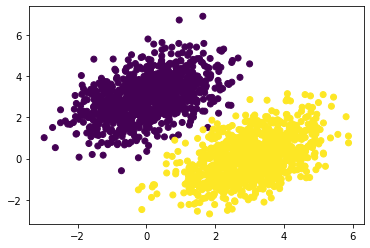

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c = targets[:,0])
plt.show()

Now, let’s create a linear classifier that can learn to separate these two blobs. A linear classifier is an affine transformation (prediction = W • input + b) trained to minimize the square of the difference between predictions and the targets.<br>
Let’s create our variables W and b, initialized with random values and with zeros respectively:

In [44]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape = (output_dim)))

The inputs will be 2D points.<br>
The output predictions will be a single score per sample (close to 0 if the sample is predicted to be in class 0, and close to 1 if the sample is predicted to be in class 1).
#### The Forward Pass Function

In [45]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Because our linear classifier operates on 2D inputs, W is really just two scalar coefficients, w1 and w2: W = [[w1], [w2]]. Meanwhile, b is a single scalar coefficient. As such, for given input point [x, y], its prediction value is: prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b.<br>
<br>Here's our loss fuction:
#### 3.19 The Mean Squared Error Loss Function:

In [46]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

`per_sample_losses` will be a tensor of with the same shape as `targets` and `predictions`, containing per-sample loss scores
We need to average these per-sample loss scores into a single scalar loss value: this is what `reduce_mean` does.
#### 3.20 The Training Step Function

In [47]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#### The Batch Training Loop

In [48]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 4.4041
loss at step 1: 0.7219
loss at step 2: 0.2208
loss at step 3: 0.1447
loss at step 4: 0.1267
loss at step 5: 0.1171
loss at step 6: 0.1093
loss at step 7: 0.1023
loss at step 8: 0.0958
loss at step 9: 0.0900
loss at step 10: 0.0846
loss at step 11: 0.0797
loss at step 12: 0.0751
loss at step 13: 0.0710
loss at step 14: 0.0672
loss at step 15: 0.0638
loss at step 16: 0.0606
loss at step 17: 0.0577
loss at step 18: 0.0551
loss at step 19: 0.0526
loss at step 20: 0.0504
loss at step 21: 0.0484
loss at step 22: 0.0465
loss at step 23: 0.0448
loss at step 24: 0.0432
loss at step 25: 0.0418
loss at step 26: 0.0405
loss at step 27: 0.0393
loss at step 28: 0.0382
loss at step 29: 0.0372
loss at step 30: 0.0363
loss at step 31: 0.0354
loss at step 32: 0.0346
loss at step 33: 0.0339
loss at step 34: 0.0333
loss at step 35: 0.0327
loss at step 36: 0.0322
loss at step 37: 0.0317
loss at step 38: 0.0312
loss at step 39: 0.0308



After 40 steps, the training loss seems to have stabilized around 0.025. Let’s plot how our linear model classifies the training data points. Because our targets are zeros and ones, a given input point will be classified as "0" if its prediction value is below 0.5, and as "1" if it is above 0.5:

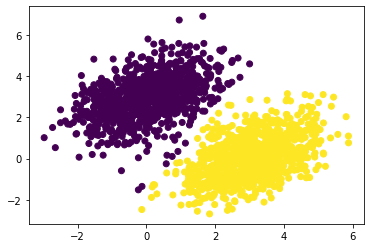

In [49]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

You’ll notice that what you’re looking at is really the equation of a line in the 2D plane: w1 * x + w2 * y + b = 0.5. Above the line, class 1, below the line, class 0. You may be used to seeing line equations in
the format y = a * x + b; in the same format, our line becomes: y = - w1 / w2 * x + (0.5 - b) / w2.<br><br>
Let’s plot this line:

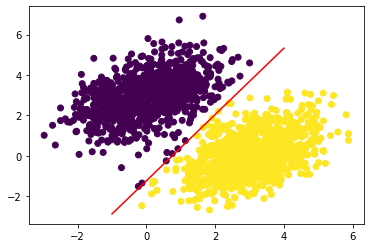

In [50]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:,0] > 0.5)

<h3><span style="color:black">3.6. Anatomy of a Neural Network: Understanding Core Keras APIs</span></h3>

#### 3.6.1 Layers: The building blocks of deep learning
Different types of layers are appropriate for different tensor formats and different types of data processing.<br>
 <table>
  <tr>
    <th>
    <th>Vector Data</th>
    <th>Sequence Data</th>
    <th>Image</th>
  </tr>
  <tr>
    <th> Type
    <td>2D tensor (`samples, features)`</td>
    <td>3D tensor (`samples, timesteps, features`)</td>
    <td>4D tensor</td>
  </tr>
  <tr>
    <th>Processed by
    <td>densely connected layers</td>
    <td>Recurreng layers such as LSTM or 1D convolution layer (Conv1D)</td>
    <td>2D convolutoin layers (`Conv2D`)</td>
  </tr>
</table>